Step 1: Import necessary libraries

In [1]:
import numpy as np # linear algebra
import gc
import matplotlib.pyplot as plt
import cv2 as cv
import os
import seaborn as sns
from keras.utils import to_categorical
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Using TensorFlow backend.


Step 2: Analyze and Visualize data

Total number of pokemons: 149
Total number of images: 10693


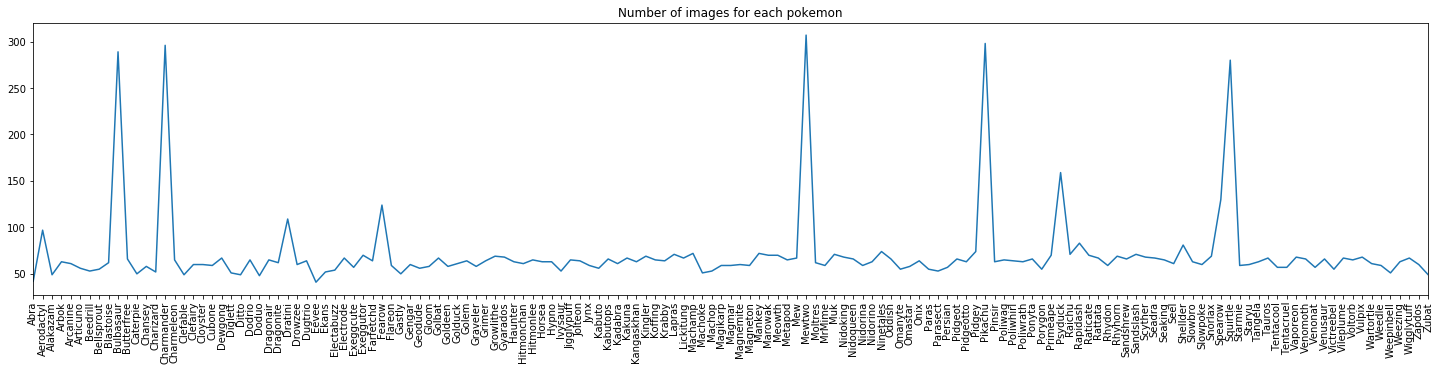

In [2]:
root_path = '/kaggle/input/pokemon-generation-one/dataset/dataset'
classes = os.listdir(root_path)
count=0
count_dict = {}
print(f'Total number of pokemons: {len(classes)}')
for pokemon in classes:
    dir_path = os.path.join(root_path, pokemon)
    count+=len(os.listdir(dir_path))
    count_dict[pokemon] = len(os.listdir(dir_path))
print(f'Total number of images: {count}')
fig = plt.figure(figsize = (25, 5))
sns.lineplot(x = list(count_dict.keys()), y = list(count_dict.values())).set_title('Number of images for each pokemon')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

In [3]:
# sorted the list of pokemons with respect to number of their appearances in the datasett
sorted_list =  sorted(count_dict.items(), key=lambda item: item[1], reverse=True)
sorted_list

[('Mewtwo', 307),
 ('Pikachu', 298),
 ('Charmander', 296),
 ('Bulbasaur', 289),
 ('Squirtle', 280),
 ('Psyduck', 159),
 ('Spearow', 130),
 ('Fearow', 124),
 ('Dratini', 109),
 ('Aerodactyl', 97),
 ('Rapidash', 83),
 ('Shellder', 81),
 ('Ninetales', 74),
 ('Pidgey', 74),
 ('Mankey', 72),
 ('Machamp', 72),
 ('Sandslash', 71),
 ('Raichu', 71),
 ('Lapras', 71),
 ('Muk', 71),
 ('Meowth', 70),
 ('Primeape', 70),
 ('Marowak', 70),
 ('Exeggutor', 70),
 ('Raticate', 70),
 ('Kingler', 69),
 ('Rhyhorn', 69),
 ('Growlithe', 69),
 ('Snorlax', 69),
 ('Scyther', 68),
 ('Vaporeon', 68),
 ('Nidoking', 68),
 ('Vulpix', 68),
 ('Gyarados', 68),
 ('Dewgong', 67),
 ('Electrode', 67),
 ('Wigglytuff', 67),
 ('Lickitung', 67),
 ('Mew', 67),
 ('Tauros', 67),
 ('Kakuna', 67),
 ('Vileplume', 67),
 ('Golbat', 67),
 ('Rattata', 67),
 ('Seadra', 67),
 ('Pidgeot', 66),
 ('Butterfree', 66),
 ('Venusaur', 66),
 ('Ponyta', 66),
 ('Venomoth', 66),
 ('Nidoqueen', 66),
 ('Oddish', 66),
 ('Sandshrew', 66),
 ('Kabutops', 66)

In [4]:
# pick the 50 most frequently appears
chosen_pokemon = sorted_list[0:50]
chosen_pokemon

[('Mewtwo', 307),
 ('Pikachu', 298),
 ('Charmander', 296),
 ('Bulbasaur', 289),
 ('Squirtle', 280),
 ('Psyduck', 159),
 ('Spearow', 130),
 ('Fearow', 124),
 ('Dratini', 109),
 ('Aerodactyl', 97),
 ('Rapidash', 83),
 ('Shellder', 81),
 ('Ninetales', 74),
 ('Pidgey', 74),
 ('Mankey', 72),
 ('Machamp', 72),
 ('Sandslash', 71),
 ('Raichu', 71),
 ('Lapras', 71),
 ('Muk', 71),
 ('Meowth', 70),
 ('Primeape', 70),
 ('Marowak', 70),
 ('Exeggutor', 70),
 ('Raticate', 70),
 ('Kingler', 69),
 ('Rhyhorn', 69),
 ('Growlithe', 69),
 ('Snorlax', 69),
 ('Scyther', 68),
 ('Vaporeon', 68),
 ('Nidoking', 68),
 ('Vulpix', 68),
 ('Gyarados', 68),
 ('Dewgong', 67),
 ('Electrode', 67),
 ('Wigglytuff', 67),
 ('Lickitung', 67),
 ('Mew', 67),
 ('Tauros', 67),
 ('Kakuna', 67),
 ('Vileplume', 67),
 ('Golbat', 67),
 ('Rattata', 67),
 ('Seadra', 67),
 ('Pidgeot', 66),
 ('Butterfree', 66),
 ('Venusaur', 66),
 ('Ponyta', 66),
 ('Venomoth', 66)]

Step 3: Generate data and preprocessing

In [5]:
#functions to augment more images
def generate_extra_two(img):
    return img[0:96, 0:96,:], img[4:100, 4:100, :]
def generate_extra_three(img):
    return generate_extra_two(img)[0], generate_extra_two(img)[1], img[2:98,2:98,:]

In [6]:
#generate data and labels
X = []
y= []
poke_label_dict = {}
i=0
for pokemon in chosen_pokemon:
    name = pokemon[0]
    poke_label_dict[i] = name
    print(name+ ': ' + str(i))
    dir_path = os.path.join(root_path, name)
    j=0
    if pokemon[1] < 70:
        for filename in os.listdir(dir_path):   
            try:
                file_path = os.path.join(dir_path, filename)
                img = cv.imread(file_path, 1)
                img = cv.resize(img, (100, 100))
                extra = generate_extra_three(img)
                for e in range(3):
                    X.append(extra[e])
                    y.append(i)
                gc.collect()
            except:
                j+=1
                print(str(j)+ " Broken file(s)")

    elif pokemon[1] < 100:
        for filename in os.listdir(dir_path):   
            try:
                file_path = os.path.join(dir_path, filename)
                img = cv.imread(file_path, 1)
                img = cv.resize(img, (100, 100))
                extra = generate_extra_two(img)
                for e in range(2):
                    X.append(extra[e])
                    y.append(i)
                gc.collect()
            except:
                j+=1
                print(str(j)+ " Broken file(s)")    
    else:
        for filename in os.listdir(dir_path):   
            try:
                file_path = os.path.join(dir_path, filename)
                img = cv.imread(file_path, 1)
                img = cv.resize(img, (96, 96))
                X.append(img)
                y.append(i)
                gc.collect()
            except:
                j+=1
                print(str(j)+ " Broken file(s)")
    i+=1    
    

Mewtwo: 0
1 Broken file(s)
Pikachu: 1
Charmander: 2
Bulbasaur: 3
Squirtle: 4
Psyduck: 5
Spearow: 6
Fearow: 7
1 Broken file(s)
2 Broken file(s)
Dratini: 8
Aerodactyl: 9
Rapidash: 10
Shellder: 11
Ninetales: 12
Pidgey: 13
Mankey: 14
Machamp: 15
1 Broken file(s)
Sandslash: 16
Raichu: 17
Lapras: 18
Muk: 19
Meowth: 20
Primeape: 21
Marowak: 22
Exeggutor: 23
1 Broken file(s)
2 Broken file(s)
Raticate: 24
Kingler: 25
1 Broken file(s)
Rhyhorn: 26
Growlithe: 27
1 Broken file(s)
Snorlax: 28
Scyther: 29
1 Broken file(s)
Vaporeon: 30
Nidoking: 31
Vulpix: 32
Gyarados: 33
1 Broken file(s)
Dewgong: 34
1 Broken file(s)
Electrode: 35
Wigglytuff: 36
Lickitung: 37
Mew: 38
Tauros: 39
Kakuna: 40
Vileplume: 41
Golbat: 42
Rattata: 43
Seadra: 44
Pidgeot: 45
Butterfree: 46
Venusaur: 47
Ponyta: 48
Venomoth: 49
1 Broken file(s)


In [8]:
#convert X to 4-dimensional tensor
X = np.array(X).reshape(-1, 96, 96, 3)
#normalize X
X = X/255.0
#convert y to one-hot-encoded form
y = to_categorical(np.array(y))

In [9]:
#check shape of X and Y
X.shape, y.shape

((9388, 96, 96, 3), (9388, 50))

In [10]:
#check if X has been normailized
X.max(),X.min()

(1.0, 0.0)

In [28]:
#split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=500,test_size=0.2)

In [30]:
#check shape of training and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7510, 96, 96, 3), (1878, 96, 96, 3), (7510, 50), (1878, 50))

In [31]:
#split data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, random_state=500,test_size=0.4)

In [32]:
#check shape of training and validation data
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4506, 96, 96, 3), (3004, 96, 96, 3), (4506, 50), (3004, 50))

In [13]:
#check length of label dictionary
len(poke_label_dict)

50

In [16]:
#visulaize some example in training set and some example in validation set
import random
def vis_ex(X,y):
    plt.figure(1,figsize=(15, 10))
    for i in range(1,9):
        c = random.randint(0, 2000)
        img = X[c]
        plt.subplot(5,8,i)
        plt.imshow(img)
        plt.title(poke_label_dict[np.argmax(y[c])])

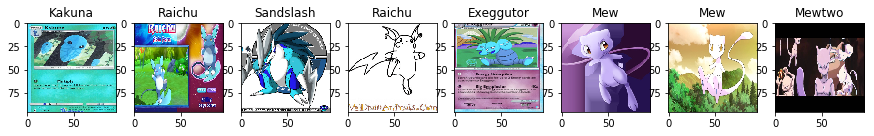

In [33]:
vis_ex(X_train, y_train)

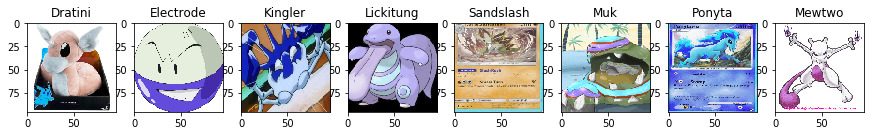

In [34]:
vis_ex(X_val, y_val)

Step 4 : Build a CNN-model based on Alex

In [50]:
model= Sequential()
#Phase 1: 2 Conv-> Pooling block
model.add(layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), 
                       padding='valid' , input_shape=(96,96,3),activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#Phase 2: Convol Phase
model.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))) #modified from pool(3,3) to fit the input
#Phase 3: Fully-connected Phase: #modify the second FC layer from original paper due to low number of training examples 
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=y_train.shape[1], activation='softmax'))

In [51]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 22, 22, 96)        34944     
_________________________________________________________________
batch_normalization_29 (Batc (None, 22, 22, 96)        384       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 96)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 256)       614656    
_________________________________________________________________
batch_normalization_30 (Batc (None, 10, 10, 256)       1024      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 4, 4, 384)        

In [52]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
#create datagen during training and validation
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   rotation_range = 45, 
                                   width_shift_range = 0.15,  
                                   height_shift_range = 0.15)
test_datagen = ImageDataGenerator(horizontal_flip=True)
train_generator =  train_datagen.flow(X_train, y_train, batch_size=256, shuffle=True)
val_generator = test_datagen.flow(X_val, y_val, batch_size=256, shuffle=True)

In [57]:
history = model.fit_generator(train_generator, validation_data=val_generator, epochs=100, 
                              steps_per_epoch=len(train_generator),validation_steps= len(val_generator))

Epoch 1/10
18/18 [==============================] - 10s 535ms/step - loss: 0.4095 - accuracy: 0.8824 - val_loss: 1.6218 - val_accuracy: 0.7107
Epoch 2/10
18/18 [==============================] - 9s 523ms/step - loss: 0.3744 - accuracy: 0.8859 - val_loss: 1.2128 - val_accuracy: 0.6794
Epoch 3/10
18/18 [==============================] - 10s 536ms/step - loss: 0.3266 - accuracy: 0.9032 - val_loss: 2.0159 - val_accuracy: 0.6751
Epoch 4/10
18/18 [==============================] - 9s 522ms/step - loss: 0.3201 - accuracy: 0.9055 - val_loss: 1.3869 - val_accuracy: 0.7051
Epoch 5/10
18/18 [==============================] - 10s 536ms/step - loss: 0.3323 - accuracy: 0.9030 - val_loss: 1.3594 - val_accuracy: 0.7354
Epoch 6/10
18/18 [==============================] - 10s 570ms/step - loss: 0.2927 - accuracy: 0.9079 - val_loss: 1.4898 - val_accuracy: 0.7557
Epoch 7/10
18/18 [==============================] - 9s 524ms/step - loss: 0.3107 - accuracy: 0.9075 - val_loss: 0.7452 - val_accuracy: 0.7423
Ep

Step 4: Evaluation

In [58]:
y_pred = model.predict(X_test)

In [61]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.62      0.45      0.52        64
           1       0.95      0.60      0.74        58
           2       0.69      0.80      0.74        71
           3       0.75      0.73      0.74        59
           4       0.58      0.80      0.67        60
           5       0.69      0.81      0.75        31
           6       0.52      0.68      0.59        19
           7       0.38      0.54      0.44        28
           8       0.58      0.55      0.56        20
           9       0.97      0.74      0.84        42
          10       0.73      0.37      0.49        30
          11       0.90      0.93      0.92        30
          12       0.82      0.56      0.67        25
          13       0.32      0.31      0.32        32
          14       0.90      0.27      0.42        33
          15       0.90      0.56      0.69        34
          16       0.80      0.55      0.65        22
          17       0.63    

In [67]:
#plot some predictions:
def vis_pred(X):
    plt.figure(1,figsize=(15, 10))
    for i in range(1,9):
        c = random.randint(0, 1000)
        img = X[c]
        plt.subplot(5,8,i)
        plt.imshow(img)
        plt.title(poke_label_dict[np.argmax(model.predict(img.reshape(1,96,96,3)))])


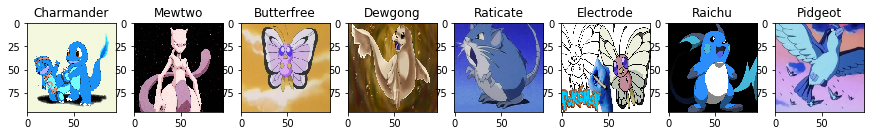

In [69]:
vis_pred(X_test)

Step 7: Save  model

In [70]:
# serialize model to JSON
model_json = model.to_json()
with open("model_pkm.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_pkm.h5")
print("Saved model to disk")

Saved model to disk
